In [ ]:
# use python 3.6 or 3.7 environment

In [2]:
import sys
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
from dlstools import *
from dlstools.pdnx import *
from matplotlib.pyplot import *

from dlstools.quickfit import *
import matplotlib.pyplot as plt

#%matplotlib inline
%matplotlib notebook
#%matplotlib nbagg

p='/dls/i16/data/2020/cm26473-2/%i.nxs'

In [3]:
pd.set_option('display.max_rows',9999)
def showscans(scans, metadata = []):
    # md is metadata list e.g. ['entry1/sample/name']
    _scanlist =[]
    for scan in scans:
        _n = pdnx(p % scan)
        dic = {}
        dic['scan'] = scan
        dic['length'] = len(_n)
        dic['command'] = _n.nx.entry1.scan_command
        dic['start_time'] = _n.nx.entry1.start_time
        for meta in metadata:
            dic[meta.split('/')[-1]] = _n.nx[meta]   
            
        _scanlist += [dic]
        
    return pd.DataFrame(_scanlist)

<IPython.core.display.Javascript object>


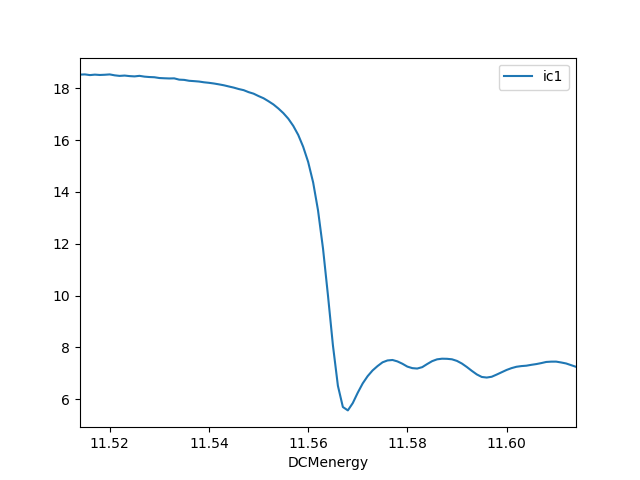

In [4]:
n = pdnx(p % 823290) # energy calibration (0.2 eV change but previous was noisy)
n.plot('DCMenergy','ic1')

<IPython.core.display.Javascript object>


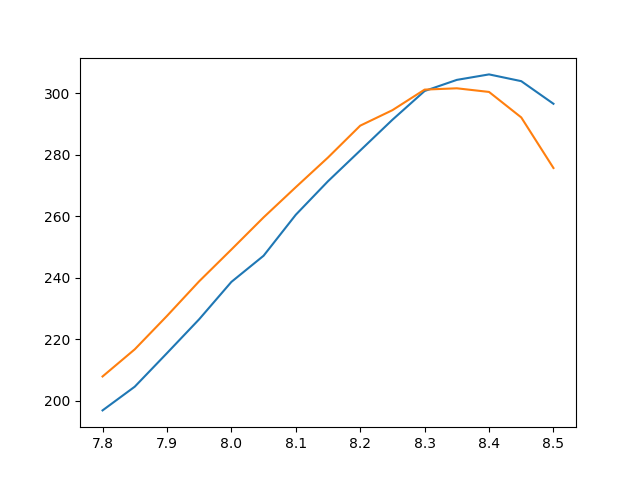

In [5]:
n = pdnx(p % 823310) # Rh coating
figure()
plot(n.DCMenergy,n.diode)
n = pdnx(p % 823311) # Si coating
plot(n.DCMenergy,n.diode)

<IPython.core.display.Javascript object>


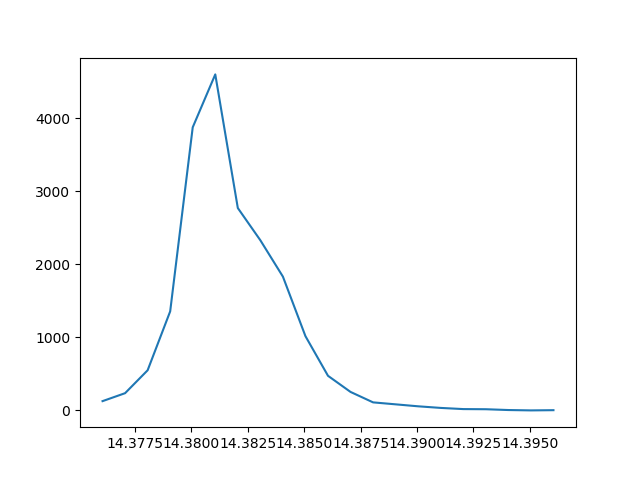

In [6]:
n = pdnx(p % 823317) # atten 200 7.5e-9
figure()
plot(n.eta,n['sum'])
n = pdnx(p % 823311) #  atten 170 7.6e-8


<IPython.core.display.Javascript object>


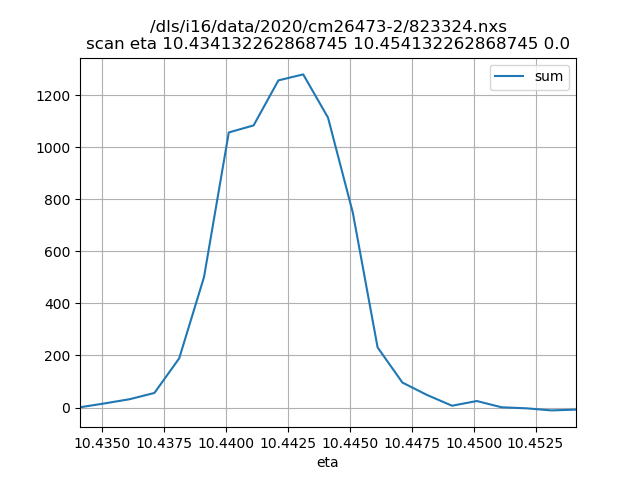

In [7]:
n = pdnx(p % 823324) # atten 170 7.6e-8
n.plt('eta','sum')

<IPython.core.display.Javascript object>


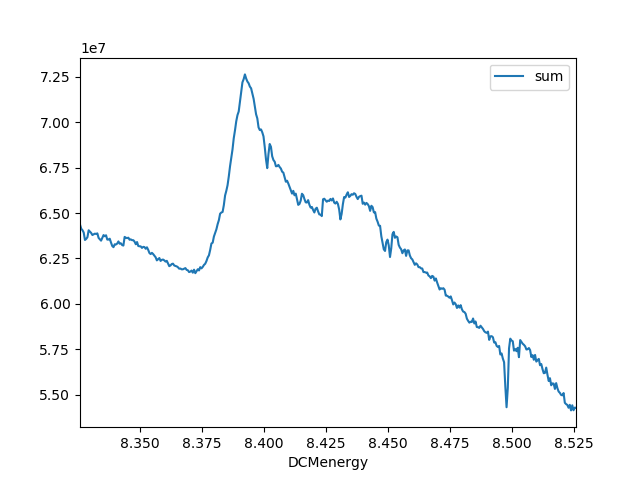

<IPython.core.display.Javascript object>


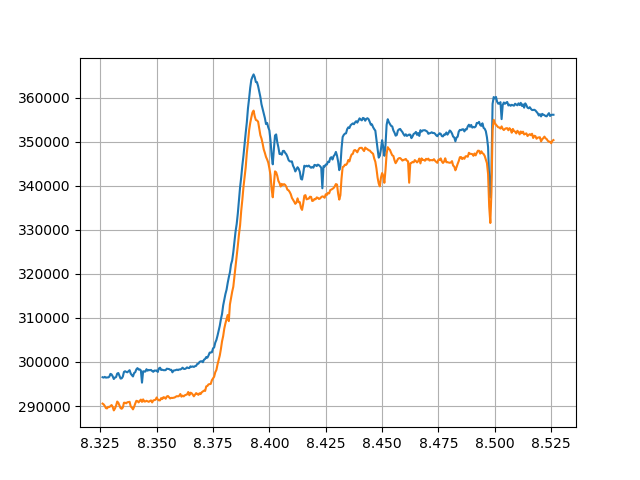

<IPython.core.display.Javascript object>


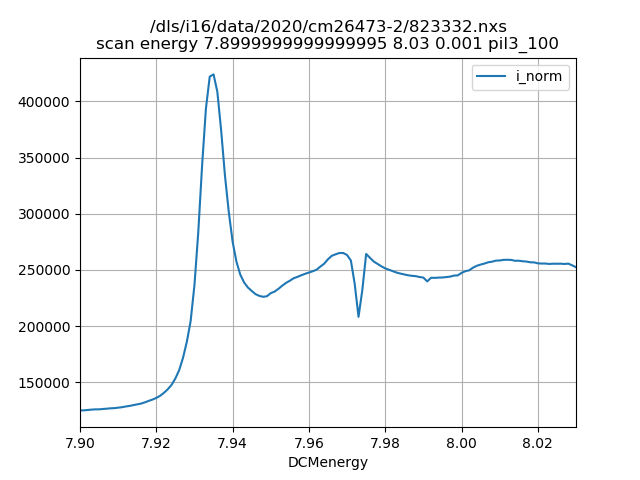

<IPython.core.display.Javascript object>


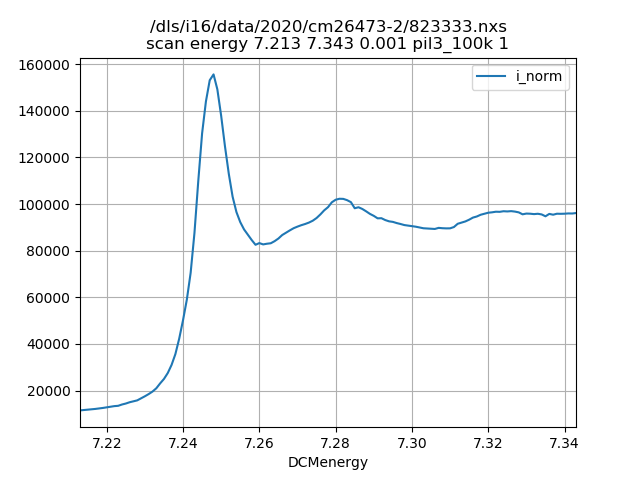

In [8]:
n = pdnx(p % 823329) # L1
n['i_norm'] = n['sum']/n.ic1monitor
n.plot('DCMenergy', 'sum')
figure()
plot(n['DCMenergy'], n['i_norm'])
n = pdnx(p % 823330) # L1
n['i_norm'] = n['sum']/n.ic1monitor
plot(n['DCMenergy'], n['i_norm']); grid(1)

n = pdnx(p % 823332) # L2
n['i_norm'] = n['sum']/n.ic1monitor
n.plt('DCMenergy', 'i_norm')

n = pdnx(p % 823333) # L3
n['i_norm'] = n['sum']/n.ic1monitor
n.plt('DCMenergy', 'i_norm')


In [ ]:
n = pdnx(p % 823335) # L1 E=8.39 keV
n['norm_sum'] = n['sum']/max(n['sum'])
figure()
plot(n.pil3_tresh, n.norm_sum)
n = pdnx(p % 823340) # L1 E=7.935 keV nominal [004] atten 50
n['norm_sum'] = n['sum']/max(n['sum'])
plot(n.pil3_tresh, n.norm_sum); grid(1)
title(n.nx.entry1.title + '  L1')

n = pdnx(p % 823336) # L2 E=7.935 keV
n['norm_sum'] = n['sum']/max(n['sum'])
figure()
plot(n.pil3_tresh, n.norm_sum)
n = pdnx(p % 823339) # L2 E=7.935 keV nominal [004] atten 50
n['norm_sum'] = n['sum']/max(n['sum'])
plot(n.pil3_tresh, n.norm_sum); grid(1)
title(n.nx.entry1.title + '  L2')

n = pdnx(p % 823337) # L3 E=7.248 keV
n['norm_sum'] = n['sum']/max(n['sum'])
figure()
plot(n.pil3_tresh, n.norm_sum)
n = pdnx(p % 823338) # L3 E=7.248 keV nominal [004] atten 50
n['norm_sum'] = n['sum']/max(n['sum'])
plot(n.pil3_tresh, n.norm_sum); grid(1)
title(n.nx.entry1.title + '  L3')


In [11]:
showscans(range(823364, 823483+1))

command  length    scan                     start_time
0    scan eta 20.931272102811946 21.13127210281195 ...      41  823364  2020-07-14T17:12:05.478+01:00
1    scan chi 89.35441462626818 90.35441462626818 0...      21  823365  2020-07-14T17:13:42.129+01:00
2    scan eta 21.02127210281294 21.041272102812943 ...      21  823366  2020-07-14T17:14:32.142+01:00
3    scan energy 8.350000000000001 8.41 5.0E-4 hkl ...     121  823367   2020-07-14T17:15:15.65+01:00
4    scan eta 22.18501356543095 22.385013565430953 ...      41  823368  2020-07-14T17:24:48.077+01:00
5    scan chi 89.35441462626818 90.35441462626818 0...      21  823369  2020-07-14T17:26:24.089+01:00
6    scan eta 22.27001356543195 22.290013565431952 ...      21  823370  2020-07-14T17:27:13.899+01:00
7    scan energy 7.8999999999999995 7.96 5.0E-4 hkl...     121  823371  2020-07-14T17:27:58.342+01:00
8    scan eta 24.438620193379947 24.63862019337995 ...      41  823372  2020-07-14T17:37:36.496+01:00
9    scan chi 89.35441462626818 90.35441462626818 0...      21  823373  2020-07-14T17:39:13.735+01:00
10   scan eta 24.523620193380946 24.54362019338095 ...      21  823374  2020-07-14T17:40:28.598+01:00
11   scan energy 7.21 7.2700000000000005 5.0E-4 hkl...     121  823375  2020-07-14T17:41:12.422+01:00
12   scan eta 20.933808870272273 21.133808870272276...      41  823376  2020-07-14T17:50:50.698+01:00
13   scan chi 89.35490120387247 90.35490120387247 0...      21  823377  2020-07-14T17:52:24.577+01:00
14   scan eta 21.018808870272277 21.03880887027228 ...      21  823378   2020-07-14T17:53:14.75+01:00
15   scan energy 8.350000000000001 8.41 5.0E-4 hkl ...     121  823379  2020-07-14T17:53:57.883+01:00
16   scan eta 22.187550332891277 22.38755033289128 ...      41  823380  2020-07-14T18:03:31.845+01:00
17   scan chi 89.35490120387247 90.35490120387247 0...      21  823381  2020-07-14T18:05:10.844+01:00
18   scan eta 22.27255033289128 22.292550332891285 ...      21  823382  2020-07-14T18:06:00.797+01:00
19   scan energy 7.8999999999999995 7.96 5.0E-4 hkl...     121  823383  2020-07-14T18:06:44.572+01:00
20   scan eta 24.44115696084127 24.641156960841272 ...      41  823384  2020-07-14T18:16:23.293+01:00
21   scan chi 89.35490120387247 90.35490120387247 0...      21  823385  2020-07-14T18:17:57.087+01:00
22   scan eta 24.521156960841278 24.54115696084128 ...      21  823386   2020-07-14T18:18:47.09+01:00
23   scan energy 7.21 7.2700000000000005 5.0E-4 hkl...     121  823387  2020-07-14T18:19:31.053+01:00
24   scan eta 20.93633675930704 21.136336759307042 ...      41  823388  2020-07-14T18:29:19.074+01:00
25   scan chi 89.35543198005905 90.35543198005905 0...      21  823389  2020-07-14T18:31:15.716+01:00
26   scan eta 21.01633675930705 21.03633675930705 0...      21  823390  2020-07-14T18:32:05.796+01:00
27   scan energy 8.350000000000001 8.41 5.0E-4 hkl ...     121  823391  2020-07-14T18:32:49.215+01:00
28   scan eta 22.19007822192704 22.39007822192704 0...      41  823392  2020-07-14T18:42:14.958+01:00
29   scan chi 89.35543198005905 90.35543198005905 0...      21  823393  2020-07-14T18:43:54.422+01:00
30   scan eta 22.270078221927047 22.29007822192705 ...      21  823394  2020-07-14T18:44:44.869+01:00
31   scan energy 7.8999999999999995 7.96 5.0E-4 hkl...     121  823395  2020-07-14T18:45:29.234+01:00
32   scan eta 24.44368484987605 24.643684849876053 ...      41  823396  2020-07-14T18:55:07.157+01:00
33   scan chi 89.35543198005905 90.35543198005905 0...      21  823397  2020-07-14T18:56:47.436+01:00
34   scan eta 24.51868484987605 24.538684849876052 ...      21  823398  2020-07-14T18:57:37.385+01:00
35   scan energy 7.21 7.2700000000000005 5.0E-4 hkl...     121  823399  2020-07-14T18:58:21.362+01:00
36   scan eta 20.938854999890275 21.138854999890277...      41  823400  2020-07-14T19:07:56.184+01:00
37   scan chi 89.35600679314452 90.35600679314452 0...      21  823401  2020-07-14T19:09:30.234+01:00
38   scan eta 21.013854999890274 21.033854999890277...      21  82340

<IPython.core.display.Javascript object>


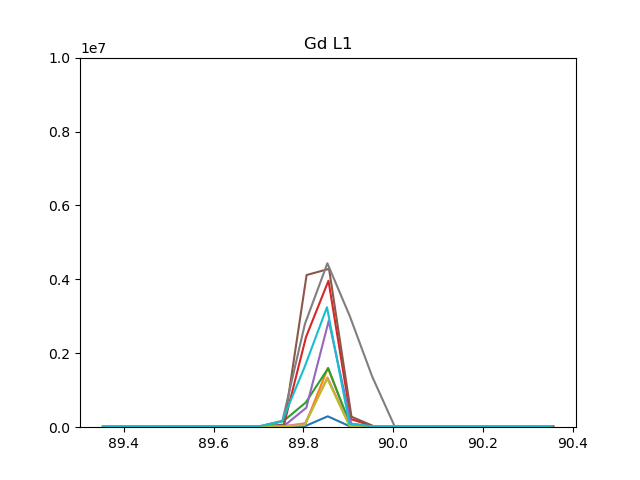

<IPython.core.display.Javascript object>


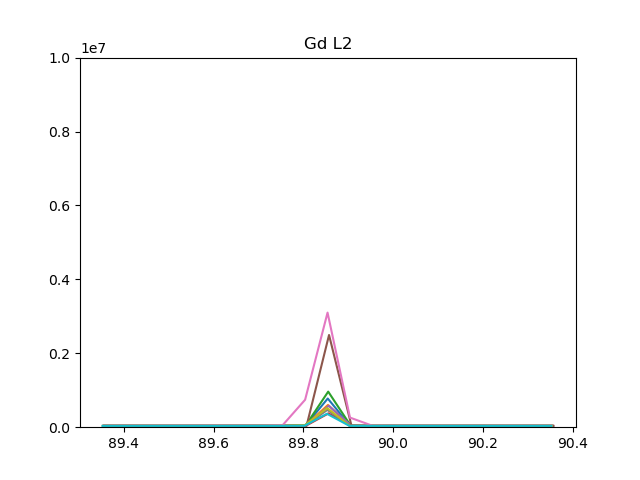

<IPython.core.display.Javascript object>


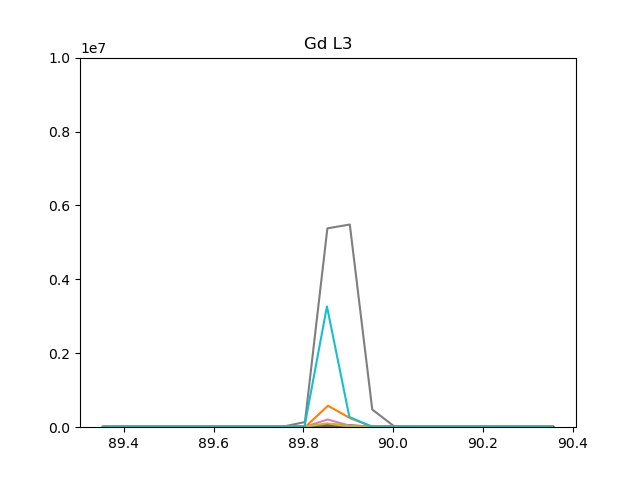

<IPython.core.display.Javascript object>


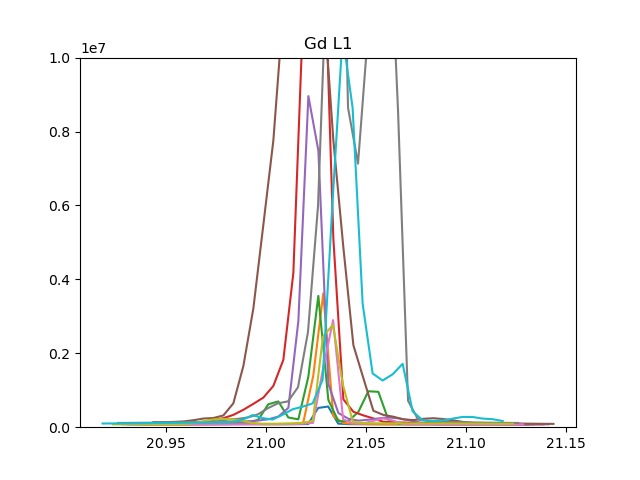

<IPython.core.display.Javascript object>


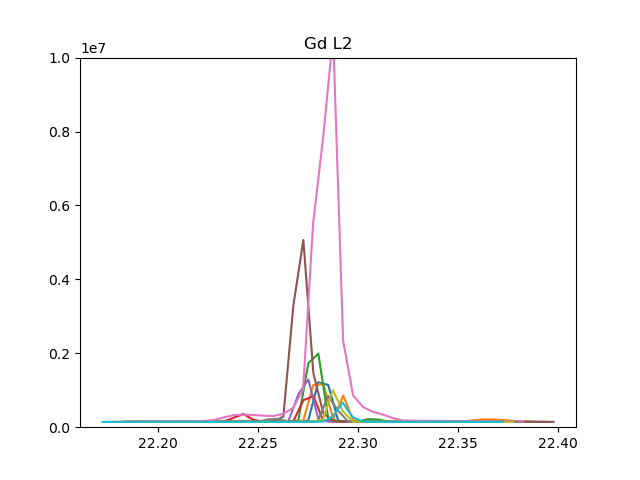

<IPython.core.display.Javascript object>


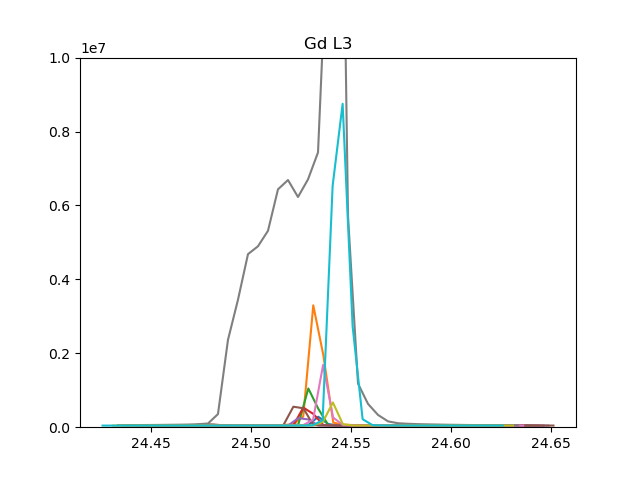

<IPython.core.display.Javascript object>


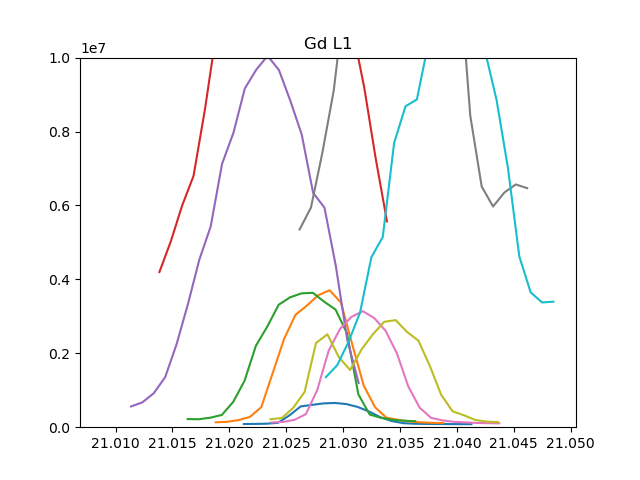

<IPython.core.display.Javascript object>


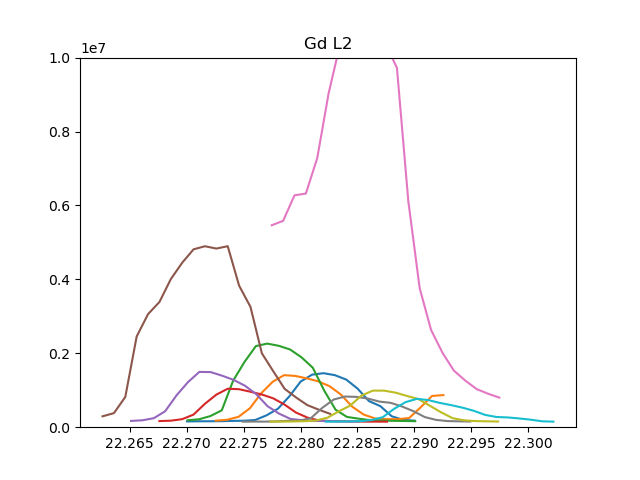

<IPython.core.display.Javascript object>


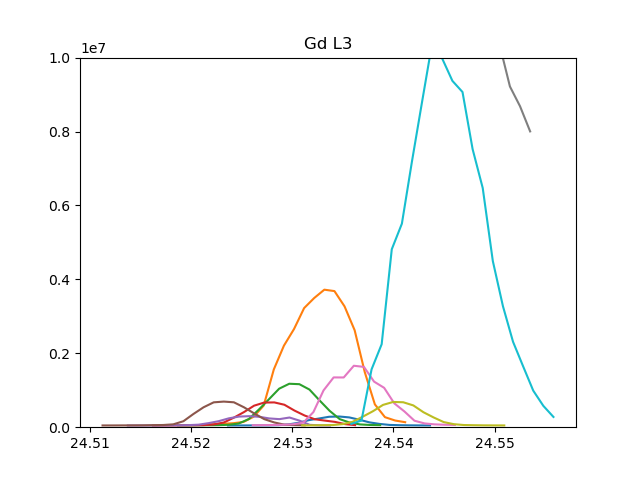

<IPython.core.display.Javascript object>


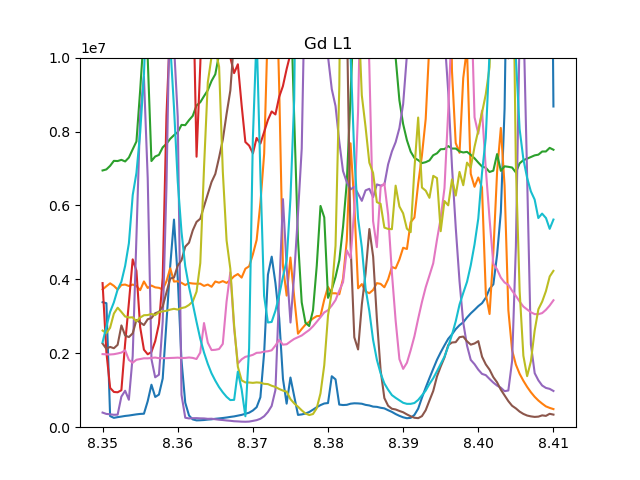

<IPython.core.display.Javascript object>


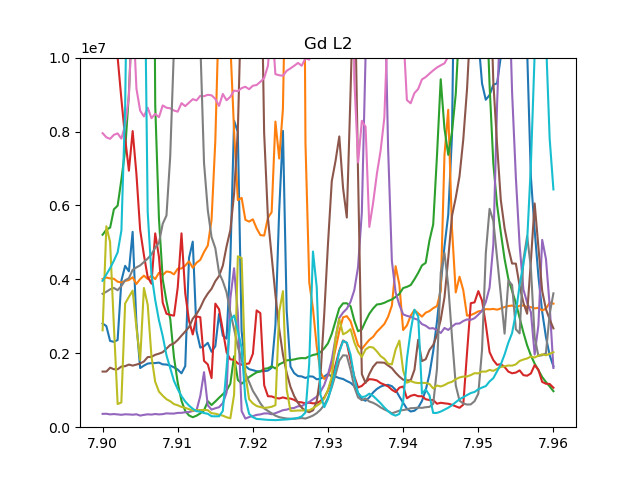

<IPython.core.display.Javascript object>


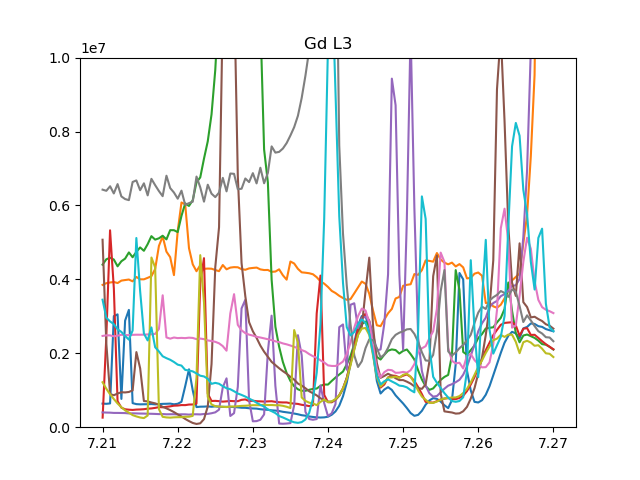

(0, 10000000.0)

In [12]:
en_l1_scans = range(823367, 823475+1, 12)
en_l2_scans = range(823371, 823479+1, 12)
en_l3_scans = range(823375, 823483+1, 12)
eta_fine_l1_scans = range(823366 , 823474+1, 12)
eta_fine_l2_scans = range(823370, 823478+1, 12)
eta_fine_l3_scans = range(823374, 823482+1, 12)
eta_l1_scans = range(823364 , 823472+1, 12)
eta_l2_scans = range(823368, 823476+1, 12)
eta_l3_scans = range(823372, 823480+1, 12)
chi_l1_scans = range(823365 , 823473+1, 12)
chi_l2_scans = range(823369, 823477+1, 12)
chi_l3_scans = range(823373, 823481+1, 12)

figure()
for scan in chi_l1_scans:
    n = pdnx(p % scan)
    plot(n.chi, n.schiroi_sum)
    title('Gd L1')    
ylim([0,1e7])

figure()
for scan in chi_l2_scans:
    n = pdnx(p % scan)
    plot(n.chi, n.schiroi_sum)
    title('Gd L2')    
ylim([0,1e7])

figure()
for scan in chi_l3_scans:
    n = pdnx(p % scan)
    plot(n.chi, n.schiroi_sum)
    title('Gd L3')    
ylim([0,1e7])

figure()
for scan in eta_l1_scans:
    n = pdnx(p % scan)
    plot(n.eta, n.roi1_sum)
    title('Gd L1')    
ylim([0,1e7])

figure()
for scan in eta_l2_scans:
    n = pdnx(p % scan)
    plot(n.eta, n.roi1_sum)
    title('Gd L2')    
ylim([0,1e7])

figure()
for scan in eta_l3_scans:
    n = pdnx(p % scan)
    plot(n.eta, n.roi1_sum)
    title('Gd L3')    
ylim([0,1e7])

figure()
for scan in eta_fine_l1_scans:
    n = pdnx(p % scan)
    plot(n.eta, n.roi1_sum)
    title('Gd L1')    
ylim([0,1e7])

figure()
for scan in eta_fine_l2_scans:
    n = pdnx(p % scan)
    plot(n.eta, n.roi1_sum)
    title('Gd L2')    
ylim([0,1e7])

figure()
for scan in eta_fine_l3_scans:
    n = pdnx(p % scan)
    plot(n.eta, n.roi1_sum)
    title('Gd L3')    
ylim([0,1e7])


figure()
for scan in en_l1_scans:
    n = pdnx(p % scan)
    plot(n.DCMenergy, n.roi1_sum)
    title('Gd L1')    
ylim([0,1e7])

figure()
for scan in en_l2_scans:
    n = pdnx(p % scan)
    plot(n.DCMenergy, n.roi1_sum)
    title('Gd L2')    
ylim([0,1e7])

figure()
for scan in en_l3_scans:
    n = pdnx(p % scan)
    plot(n.DCMenergy, n.roi1_sum)
    title('Gd L3')    
ylim([0,1e7])

In [13]:
showscans(range(823504, 823640+1))

command  length    scan                     start_time
0    scan eta 20.81725180660414 21.117251806604138 ...      61  823504  2020-07-15T10:42:40.881+01:00
1    scan chi 89.35680910427088 90.35680910427088 0...      21  823505  2020-07-15T10:44:25.587+01:00
2    scan eta 21.062251806604696 21.0822518066047 0...      21  823506  2020-07-15T10:45:05.473+01:00
3    scan psi 18.0 22.0 0.05 hkl [0.008640045276201...      81  823507  2020-07-15T10:45:40.298+01:00
4    scan eta 22.07099326922414 22.370993269224137 ...      61  823508  2020-07-15T10:48:12.628+01:00
5    scan chi 89.35680910427088 90.35680910427088 0...      21  823509  2020-07-15T10:49:44.969+01:00
6    scan eta 22.315993269224695 22.335993269224698...      21  823510  2020-07-15T10:50:49.095+01:00
7    scan psi 18.0 22.0 0.05 hkl [0.008344832514091...      81  823511  2020-07-15T10:51:24.256+01:00
8    scan eta 24.324599897173137 24.624599897173134...      61  823512   2020-07-15T10:53:58.56+01:00
9    scan chi 89.35680910427088 90.35680910427088 0...      21  823513  2020-07-15T10:55:28.887+01:00
10   scan eta 24.569599897174133 24.589599897174136...      21  823514  2020-07-15T10:56:08.518+01:00
11   scan psi 18.0 22.0 0.05 hkl [0.010135645797905...      81  823515  2020-07-15T10:56:42.814+01:00
12   scan eta 20.822271895896442 21.12227189589644 ...      61  823516  2020-07-15T10:59:19.368+01:00
13   scan chi 89.35559072340106 90.35559072340106 0...      21  823517  2020-07-15T11:01:23.223+01:00
14   scan eta 21.06227189589622 21.082271895896223 ...      21  823518  2020-07-15T11:02:03.916+01:00
15   scan psi 20.0 24.0 0.05 hkl [0.007456723484583...      81  823519  2020-07-15T11:02:39.205+01:00
16   scan eta 22.076013358516455 22.376013358516452...      61  823520  2020-07-15T11:05:15.558+01:00
17   scan chi 89.35559072340106 90.35559072340106 0...      21  823521  2020-07-15T11:06:49.548+01:00
18   scan eta 22.311013358516224 22.331013358516227...      21  823522  2020-07-15T11:07:32.224+01:00
19   scan psi 20.0 24.0 0.05 hkl [0.007456723484630...      81  823523  2020-07-15T11:08:08.658+01:00
20   scan eta 24.329619986465453 24.62961998646545 ...      61  823524  2020-07-15T11:11:14.434+01:00
21   scan chi 89.35559072340106 90.35559072340106 0...      21  823525   2020-07-15T11:12:50.23+01:00
22   scan eta 24.56461998646545 24.58461998646545 0...      21  823526  2020-07-15T11:13:32.799+01:00
23   scan psi 20.0 24.0 0.05 hkl [0.009223970062696...      81  823527  2020-07-15T11:14:07.554+01:00
24   scan eta 20.827331448460534 21.12733144846053 ...      61  823528  2020-07-15T11:16:49.028+01:00
25   scan chi 89.35454828330631 90.35454828330631 0...      21  823529  2020-07-15T11:18:24.376+01:00
26   scan eta 21.0573314484616 21.077331448461603 0...      21  823530  2020-07-15T11:19:07.184+01:00
27   scan psi 22.000000000000004 26.000000000000004...      81  823531  2020-07-15T11:19:42.258+01:00
28   scan eta 22.081072911079524 22.38107291107952 ...      61  823532  2020-07-15T11:22:43.171+01:00
29   scan chi 89.35454828330631 90.35454828330631 0...      21  823533  2020-07-15T11:24:14.988+01:00
30   scan eta 22.311072911080604 22.331072911080607...      21  823534  2020-07-15T11:24:55.024+01:00
31   scan psi 22.000000000000004 26.000000000000004...      81  823535  2020-07-15T11:25:30.124+01:00
32   scan eta 24.33467953902953 24.634679539029527 ...      61  823536  2020-07-15T11:28:11.296+01:00
33   scan chi 89.35454828330631 90.35454828330631 0...      21  823537  2020-07-15T11:29:42.372+01:00
34   scan eta 24.564679539030525 24.584679539030528...      21  823538  2020-07-15T11:30:48.025+01:00
35   scan psi 22.000000000000004 26.000000000000004...      81  823539  2020-07-15T11:31:22.714+01:00
36   scan eta 20.832424299941565 21.13242429994156 ...      61  823540  2020-07-15T11:34:01.611+01:00
37   scan chi 89.35368305406314 90.35368305406314 0...      21  823541  2020-07-15T11:35:31.655+01:00
38   scan eta 21.05742429994115 21.077424299941153 ...      21  82354

<IPython.core.display.Javascript object>


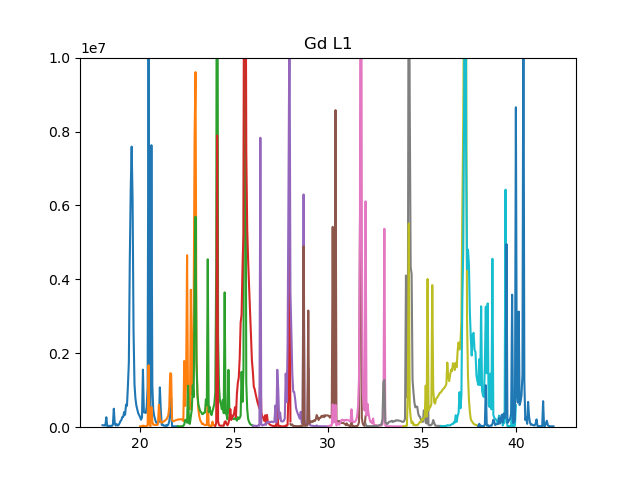

(0, 10000000.0)

In [14]:
%matplotlib notebook
#losing alignment. check with 004 allowed.

psi_l1_scans = range(823507, 823640+1, 12)
psi_l2_scans = range(823511, 823640+1, 12)
psi_l3_scans = range(823515, 823640+1, 12)

figure()
for scan in psi_l3_scans:
    n = pdnx(p % scan)
    plot(n.psi, n.roi1_sum)
    title('Gd L3')    
ylim([0,1e7])

<IPython.core.display.Javascript object>


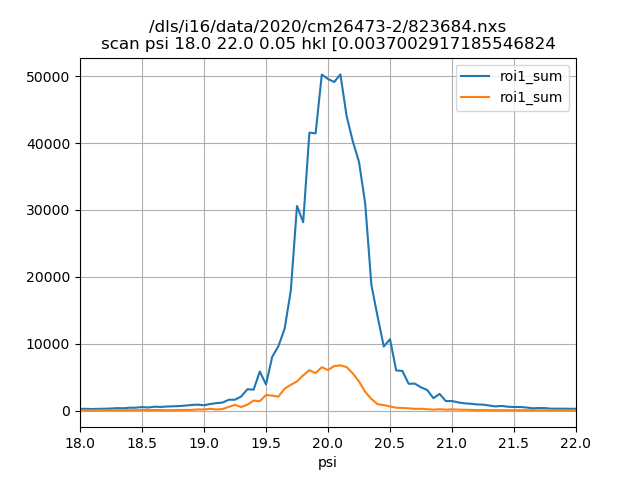

<IPython.core.display.Javascript object>


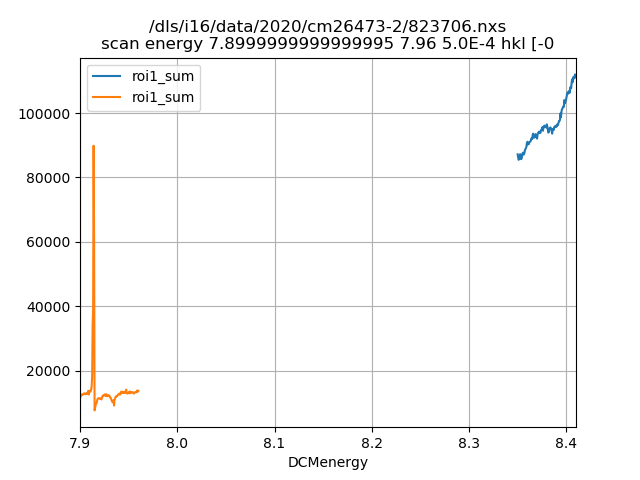

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
pdnx(p % 823680).plt('psi', 'roi1_sum', ax=ax)
pdnx(p % 823684).plt('psi', 'roi1_sum', ax=ax)

fig, ax = plt.subplots(1, 1)
pdnx(p % 823702).plt('DCMenergy', 'roi1_sum', ax = ax)
pdnx(p % 823706).plt('DCMenergy', 'roi1_sum', ax = ax)


In [ ]:
showscans(range(823760, 824137+1))

<IPython.core.display.Javascript object>


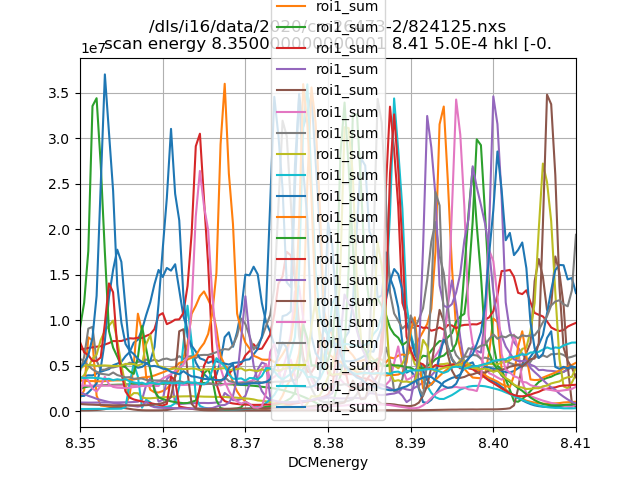

<IPython.core.display.Javascript object>


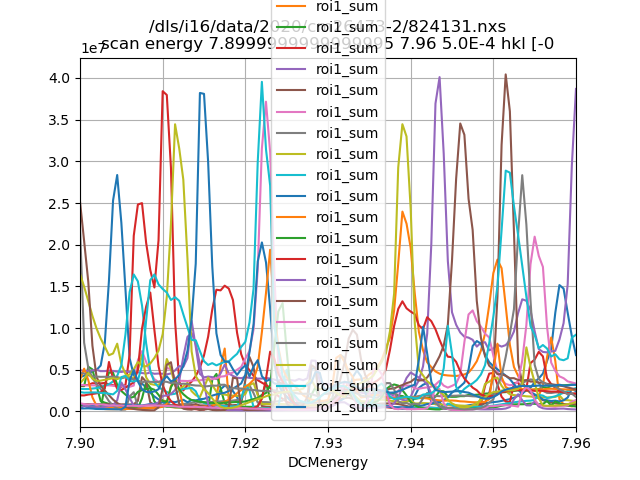

<IPython.core.display.Javascript object>


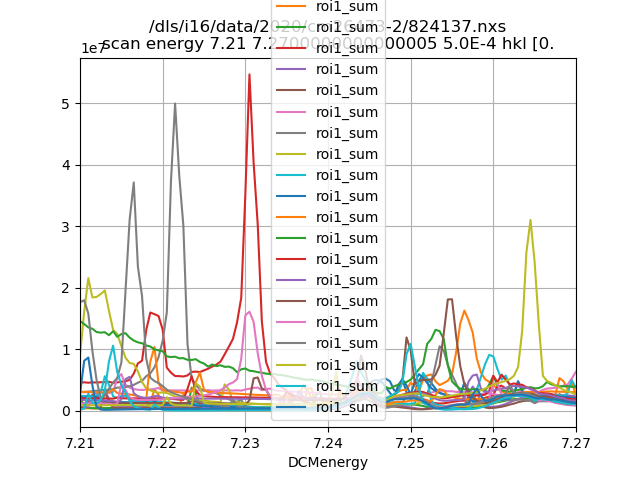

<IPython.core.display.Javascript object>


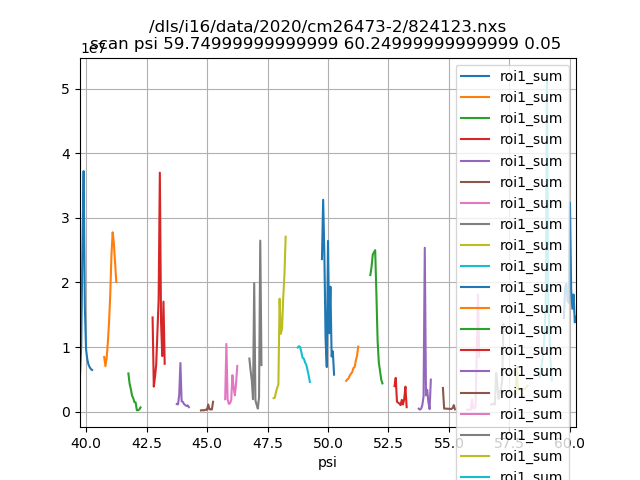

<IPython.core.display.Javascript object>


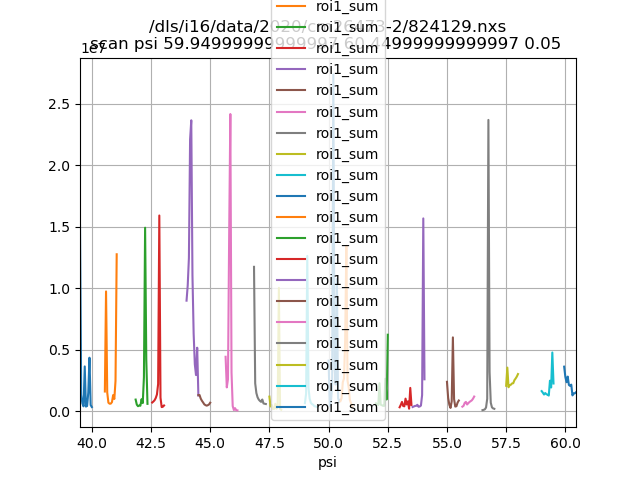

<IPython.core.display.Javascript object>


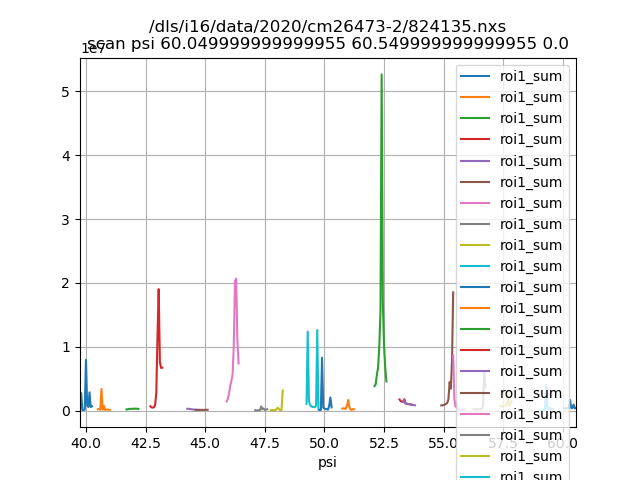

In [16]:
first = 823760
last = 824137
psi_l1_scans = range(823763, last+1, 18)
psi_l2_scans = range(823769, last+1, 18)
psi_l3_scans = range(823775, last+1, 18)
en_l1_scans = range(823765, last+1, 18)
en_l2_scans = range(823771, last+1, 18)
en_l3_scans = range(823777, last+1, 18)

fig, ax = plt.subplots(1, 1)
for scan in en_l1_scans:
    pdnx(p % scan).plt('DCMenergy', 'roi1_sum', ax=ax)

fig, ax = plt.subplots(1, 1)
for scan in en_l2_scans:
    pdnx(p % scan).plt('DCMenergy', 'roi1_sum', ax=ax)
    
fig, ax = plt.subplots(1, 1)
for scan in en_l3_scans:
    pdnx(p % scan).plt('DCMenergy', 'roi1_sum', ax=ax)

#ylim([0,1e7])


fig, ax = plt.subplots(1, 1)
for scan in psi_l1_scans:
    pdnx(p % scan).plt('psi', 'roi1_sum', ax=ax)

fig, ax = plt.subplots(1, 1)
for scan in psi_l2_scans:
    pdnx(p % scan).plt('psi', 'roi1_sum', ax=ax)
    
fig, ax = plt.subplots(1, 1)
for scan in psi_l3_scans:
    pdnx(p % scan).plt('psi', 'roi1_sum', ax=ax)

#ylim([0,1e7])


In [17]:
showscans(range(824165, 825283+1), metadata = ['entry1/sample/beam/incident_energy','entry1/before_scan/psi/psi'])

command incident_energy  length            psi    scan                     start_time
0     scan idgap 6.36085 6.400849999999999 0.002 Bea...   7.24399716251      21          61.75  824165  2020-07-16T10:48:38.614+01:00
1     scan eta 24.374194904580946 24.674194904580943...   7.24399716251      61  45.0002243364  824166  2020-07-16T10:49:14.018+01:00
2     scan chi 89.35441462626818 90.35441462626818 0...   7.24400161918      21  44.9988016943  824167  2020-07-16T10:50:47.797+01:00
3     scan eta 24.60781523218753 24.64781523218753 0...   7.21399770109      41  44.9997175976  824168  2020-07-16T10:51:35.317+01:00
4     scan eta 24.607982027288354 24.647982027288354...   7.21399991026      41  45.0997706366  824169  2020-07-16T10:52:41.732+01:00
5     scan eta 24.608148756052127 24.648148756052127...   7.21399991026      41  45.1998401746  824170  2020-07-16T10:53:48.153+01:00
6     scan eta 24.60831541797369 24.648315417973688 ...   7.21399770109      41  45.2998895425  824171  2020-07-16T10:54:54.982+01:00
7     scan eta 24.60848201254362 24.64848201254362 0...   7.21399991026      41  45.3999276887  824172  2020-07-16T10:56:01.883+01:00
8     scan eta 24.6086485392557 24.6486485392557 0.0...   7.21399770109      41  45.5000029412  824173   2020-07-16T10:57:09.18+01:00
9     scan eta 24.608814997602064 24.648814997602063...   7.21399991026      41  45.6000669787  824174  2020-07-16T10:58:15.667+01:00
10    scan eta 24.608981387075684 24.648981387075683...   7.21400432861      41  45.7001087939  824175  2020-07-16T10:59:22.144+01:00
11    scan eta 24.609147707168244 24.649147707168243...   7.21399770109      41  45.8001913788  824176  2020-07-16T11:00:29.403+01:00
12    scan eta 24.609313957376255 24.649313957376254...   7.21399991026      41  45.9002313621  824177   2020-07-16T11:01:36.48+01:00
13    scan eta 24.609480137189987 24.649480137189986...   7.21400211943      41  46.0003102984  824178  2020-07-16T11:02:44.051+01:00
14    scan eta 24.609646246106134 24.649646246106133...   7.21399770109      41  46.1003761609  824179  2020-07-16T11:03:51.242+01:00
15    scan eta 24.60981228361651 24.64981228361651 0...   7.21399770109      41  46.2004383666  824180  2020-07-16T11:04:59.581+01:00
16    scan eta 24.60997824921613 24.64997824921613 0...   7.21399991026      41  46.2994801734  824181  2020-07-16T11:06:08.268+01:00
17    scan eta 24.61014414239921 24.65014414239921 0...   7.21399991026      41  46.3995442121  824182   2020-07-16T11:07:17.85+01:00
18    scan eta 24.610309962661372 24.65030996266137 ...   7.21400211943      41   46.499610062  824183  2020-07-16T11:08:28.225+01:00
19    scan eta 24.61047570949572 24.65047570949572 0...   7.21399549191      41  46.5996596697  824184  2020-07-16T11:09:38.501+01:00
20    scan eta 24.610641382398764 24.650641382398764...   7.21399770109      41  46.6997381634  824185  2020-07-16T11:10:49.812+01:00
21    scan eta 24.610806980866176 24.650806980866175...   7.21400653778      41  46.7998040344  824186  2020-07-16T11:12:00.497+01:00
22    scan eta 24.610972504392304 24.650972504392303...   7.21399770109      41  46.8998921379  824187  2020-07-16T11:13:12.148+01:00
23    scan eta 24.61113795247277 24.65113795247277 0...   7.21399991026      41  46.9999357792  824188  2020-07-16T11:14:21.839+01:00
24    scan eta 24.611303324604744 24.651303324604743...   7.21399770109      41  47.1000034858  824189  2020-07-16T11:15:32.324+01:00
25    scan eta 24.61146862028537 24.651468620285367 ...   7.21400432861      41  47.2000711963  824190  2020-07-16T11:16:44.122+01:00
26    scan eta 24.61163383900715 24.65163383900715 0...   7.21399770109      41  47.3001389058  824191  2020-07-16T11:17:55.254+01:00
27    scan eta 24.61179898027203 24.65179898027203 0...   7.21400211943      41  47.4002066158  824192  2020-07-16T11:19:06.402+01:00
28    scan eta 24.611964043572055 24.651964043572054...   7.21399991026      41  47.5002761579  824193  2020-07-16T11:20:16.856+01:00
29    scan eta 24.6121290284

In [ ]:
# get smallest area for each energy
max_width = 0.01 # ignore wide peaks
res = {}
for scan in range(824168, 825675+1):
    n = pdnx(p % scan)
    if len(n.beamOK) == 41: #it's a fine eta scan
        
        en = round(float(n.nx['entry1/sample/beam/incident_energy']), 3)
        psi = n.nx['entry1/before_scan/psi/psi']
        
        [centre, fwhm_sd, fwhm_area, xsum, height, area, m, c] = peak(n.eta, n.roi1_sum-n.scroi_bg_sum, 3)
        #print(en, centre-np.mean(n.eta), np.max(n.eta)-np.min(n.eta), fwhm_sd, area, float(psi))
        
        if not np.isnan(fwhm_sd) and fwhm_sd < max_width:
        
            if en in res.keys():

                if area < res[en]['area']:   
                    res[en] = {'area': area, 'fwhm_sd': fwhm_sd, 'fwhm_area': fwhm_area, 'centre': centre, 'psi': float(psi)}
            else:

                res[en] = {'area': area, 'fwhm_sd': fwhm_sd, 'fwhm_area': fwhm_area, 'centre': centre, 'psi': float(psi)}
        
        #plot(n.eta, n.roi1_sum-n.scroi_bg_sum)

en, cts, psi , centre, fwhm_sd, fwhm_area = [], [], [], [], [], []
for pt in res:
    en += [pt]
    cts += [res[pt]['area']]
    psi += [res[pt]['psi']]
    fwhm_sd += [res[pt]['fwhm_sd']]
    fwhm_area += [res[pt]['fwhm_area']]
    centre += [res[pt]['centre']]
    
    
en, cts, psi, fwhm_sd, centre, fwhm_area = np.array(en), np.array(cts), np.array(psi), np.array(fwhm_sd), np.array(centre), np.array(fwhm_area)

figure(); plot(en, cts, '-o'); title('area'); grid(1)
figure(); plot(en, psi, '-o'); title('psi'); grid(1)
figure(); plot(en, fwhm_sd, '-o'); title('fwhm_sd'); grid(1)
figure(); plot(en, fwhm_area, '-o'); title('fwhm_area'); grid(1)
figure(); plot(en, centre, '-o'); title('centre'); grid(1)


In [ ]:
figure(); plot(en, cts, '-o'); title('area'); grid(1)
figure(); plot(en, psi, '-o'); title('psi'); grid(1)
figure(); plot(en, fwhm_sd, '-o'); title('fwhm'); grid(1)
figure(); plot(en, centre, '-o'); title('centre'); grid(1)

In [ ]:
res

In [ ]:
# look at all eta scans for each energy

#figure()
en = 0
for scan in range(824168, 825675+1):
#for scan in range(824168, 824200+1):
#for scan in range(824168, 824170+1):

    enold = en
    n = pdnx(p % scan)
    en = round(float(n.nx['entry1/sample/beam/incident_energy']), 3)
    
    if enold - en != 0: #new figure for new energy
        figure()
        
    psi = n.nx['entry1/before_scan/psi/psi']
    n['psi'] = psi * np.ones(len(n))       
    plot((n.eta-np.mean(n.eta))*2 + psi, n.roi1_sum-n.scroi_bg_sum) #eta width doubled for clearer plot
    ylim([0, 2e6])
    title('Energy %.4g keV' % en)


        
    
        



In [ ]:
#schiroi = HardwareTriggerableDetectorDataProcessor('schiroi', pil3, [SumMaxPositionAndValue()])
#iw=50; jw=1; schiroi.setRoi(int(ci-iw/2.),int(cj-jw/2.),int(ci+iw/2.),int(cj+jw/2.))

#scroi_bg = HardwareTriggerableDetectorDataProcessor('scroi_bg', pil3, [SumMaxPositionAndValue()])
#iw=13; jw=15; scroi_bg.setRoi(int(ci-iw/2.),int(cj-jw/2.-16),int(ci+iw/2.),int(cj+jw/2.-16))

# test file - found data ok
p='/dls/i16/data/2020/cm26473-1/%i.nxs'
n=pdnx(p % 807001)

#recent file - no data
#p='/dls/i16/data/2020/cm26473-2/%i.nxs'
#n = pdnx(p % 824166)
#n = pdnx(p % 824168)

print(n.nx.entry1.pil3_100k.tree)

print(n.nx.entry1.pil3_100k.data.shape, sum(sum(sum(n.nx.entry1.pil3_100k.data))) )
print([sum(sum(n.nx.entry1.pil3_100k.data[i])) for i in range(n.nx.entry1.pil3_100k.data.shape[0])])
    
figure()
imshow(n.nx.entry1.pil3_100k.data[1])


In [ ]:
#Official beam time 28-31 July 2020
#Mono problems and power outage - just a few hours to test cvscan script
p='/dls/i16/data/2020/mm25913-2/%i.nxs'

In [ ]:

#n=pdnx(p % 828189) #idgap
#n
showscans(range(828189, 830435))

In [ ]:
#print(n.nx.tree)
#n = pdnx(p % 828192)

n = pdnx(p % 830031)
n.find('data')
n.nx.entry1.instrument.kthZebraPil3.data.shape
dat = n.nx.entry1.instrument.kthZebraPil3.data.sum((1,2))
n['datsum'] = dat
n
n.plot('kthZebra','datsum')

In [ ]:
print(n.nx.tree)

In [ ]:
p='/dls/i16/data/2020/mm25913-2/%i.nxs'

# test scan pil3_100k (step scan) - OK
n=pdnx(p % 828123)
imshow(n.nx.entry1.pil3_100k.data[1])

# test scan kthZebraPil3 (cvscan) - OK
n=pdnx(p % 828120)
#imshow(n.nx.entry1.kthZebraPil3.data[1])

In [ ]:
#showscans(range(830544, 830550))
showscans(range(830649, 830819))

In [ ]:
#scan timing tests
# cvscan kthZebra kth_val-.03 kth_val+0.03 .0005 kthZebraPil3 .1 ##  21 sec/scan (12.1 sec counting, o/head 9 sec)
# cvscan kthZebra kth_val-.03 kth_val+0.03 .0005 kthZebraPil3 .02 ## 12 sec (2.4 sec counting, o/head 9 sec)
# cvscan kthZebra kth_val-.03 kth_val+0.03 .0005 kthZebraPil3 .05 ## 14 sec (5 sec counting, o/head 9 sec)
# time in days
#(160 + 200) * 100 * 14. /3600/24
#~ 3 days with 0.1 deg psi instead of 0.05

In [ ]:
#n = pdnx(p % 834500)
#n = pdnx(p % 840752) # nothing
#n = pdnx(p % 84000) # ok 8.346 keV small roi needs moving
n = pdnx(p % 855227) # ok 

ci, cj = 242, 95
iw=50; jw=50
lcroi = (int(ci-iw/2.), int(cj-jw/2.), int(ci+iw/2.), int(cj+jw/2.))
iw=13; jw=15
scroi = (int(ci-iw/2.), int(cj-jw/2.), int(ci+iw/2.), int(cj+jw/2.))
scroi_bg = (int(ci-iw/2.), int(cj-jw/2.-16), int(ci+iw/2.), int(cj+jw/2.-16))

# no data 840650 - 840752 (8.357 - 8.3485 keV)

n.find('data')
n.find('incident_energy')
n.find('psi')
n.nx.entry1.instrument.kthZebraPil3.data.shape
dat = n.nx.entry1.instrument.kthZebraPil3.data.sum((1,2))
n['datsum'] = dat
n.plt('kthZebra','datsum')

r =  lcroi
n['lcroi_sum'] = n.nx.entry1.instrument.kthZebraPil3.data[:, r[1]:r[3], r[0]:r[2]].sum((1,2))
n.plt('kthZebra','lcroi_sum')

r =  scroi
n['scroi_sum'] = n.nx.entry1.instrument.kthZebraPil3.data[:, r[1]:r[3], r[0]:r[2]].sum((1,2))
n.plt('kthZebra','scroi_sum')


In [ ]:
n = pdnx(p % 846977) 
#print(n.nx.tree)
n.find('incident_energy')
n.find('psi')
n.nx.entry1.start_time

In [ ]:

#roi1 = scroi=HardwareTriggerableDetectorDataProcessor('roi1', pil3, [SumMaxPositionAndValue()])
#iw=13; jw=15; roi1.setRoi(int(ci-iw/2.),int(cj-jw/2.),int(ci+iw/2.),int(cj+jw/2.))

#roi2 = lcroi=HardwareTriggerableDetectorDataProcessor('roi2', pil3, [SumMaxPositionAndValue()])
#iw=50; jw=50; roi2.setRoi(int(ci-iw/2.),int(cj-jw/2.),int(ci+iw/2.),int(cj+jw/2.))


#scroi_bg = HardwareTriggerableDetectorDataProcessor('scroi_bg', pil3, [SumMaxPositionAndValue()])
#iw=13; jw=15; scroi_bg.setRoi(int(ci-iw/2.),int(cj-jw/2.-16),int(ci+iw/2.),int(cj+jw/2.-16)



ci, cj = 242, 95

iw=50; jw=50
lcroi = (int(ci-iw/2.), int(cj-jw/2.), int(ci+iw/2.), int(cj+jw/2.))
iw=13; jw=15
scroi = (int(ci-iw/2.), int(cj-jw/2.), int(ci+iw/2.), int(cj+jw/2.))
scroi_bg = (int(ci-iw/2.), int(cj-jw/2.-16), int(ci+iw/2.), int(cj+jw/2.-16))



#scroi_bg = HardwareTriggerableDetectorDataProcessor('scroi_bg', pil3, [SumMaxPositionAndValue()])
#iw=13; jw=15; scroi_bg.setRoi(int(ci-iw/2.),int(cj-jw/2.-16),int(ci+iw/2.),int(cj+jw/2.-16))



r =  lcroi
len(n.nx.entry1.instrument.kthZebraPil3.data[:, r[1]:r[3], r[0]:r[2]].sum((1,2)))


In [ ]:
#modified from previous script - now with kth cvscans and sums extracted from images
# get smallest area for each energy
max_width = 0.01 # ignore wide peaks
res = {}
for scan in range(830649, 835662+1):
    n = pdnx(p % scan)
    if len(n) == 121: #it's a fine eta scan
        
        en = round(float(n.nx['entry1/sample/beam/incident_energy']), 4)
        psi = n.nx['entry1/before_scan/psi/psi']
        
        r =  scroi
        n['scroi_sum'] = n.nx.entry1.instrument.kthZebraPil3.data[:, r[1]:r[3], r[0]:r[2]].sum((1,2))        
        r =  scroi_bg
        n['scroi_bg_sum'] = n.nx.entry1.instrument.kthZebraPil3.data[:, r[1]:r[3], r[0]:r[2]].sum((1,2))   
        [centre, fwhm_sd, fwhm_area, sum, height, area, m, c] = peak(n.kthZebra, n.scroi_sum-n.scroi_bg_sum, 3)
        
        #print(en, centre-np.mean(n.eta), np.max(n.eta)-np.min(n.eta), fwhm_sd, area, float(psi))
        
        if not np.isnan(fwhm_sd) and fwhm_sd < max_width:
        
            if en in res.keys():

                if area < res[en]['area']:   
                    res[en] = {'area': area, 'fwhm_sd': fwhm_sd, 'fwhm_area': fwhm_area, 'centre': centre, 'psi': float(psi)}
            else:

                res[en] = {'area': area, 'fwhm_sd': fwhm_sd, 'fwhm_area': fwhm_area, 'centre': centre, 'psi': float(psi)}
        
        #plot(n.eta, n.roi1_sum-n.scroi_bg_sum)

en, cts, psi , centre, fwhm_sd, fwhm_area = [], [], [], [], [], []
for pt in res:
    en += [pt]
    cts += [res[pt]['area']]
    psi += [res[pt]['psi']]
    fwhm_sd += [res[pt]['fwhm_sd']]
    fwhm_area += [res[pt]['fwhm_area']]
    centre += [res[pt]['centre']]
    
    
en, cts, psi, fwhm_sd, centre, fwhm_area = np.array(en), np.array(cts), np.array(psi), np.array(fwhm_sd), np.array(centre), np.array(fwhm_area)

figure(); plot(en, cts, '-o'); title('area'); grid(1)
figure(); plot(en, psi, '-o'); title('psi'); grid(1)
figure(); plot(en, fwhm_sd, '-o'); title('fwhm_sd'); grid(1)
figure(); plot(en, fwhm_area, '-o'); title('fwhm_area'); grid(1)
figure(); plot(en, centre, '-o'); title('centre'); grid(1)


In [ ]:
# modified tmp version with detector sum
# might need try/except
pd.set_option('display.max_rows',9999)
def showscans1(scans, metadata = []):
    # md is metadata list e.g. ['entry1/sample/name']
    _scanlist =[]
    for scan in scans:
        _n = pdnx(p % scan)
        try:
            dic = {}
            dic['scan'] = scan
            dic['length'] = len(_n)
            dic['command'] = _n.nx.entry1.scan_command
            dic['start_time'] = _n.nx.entry1.start_time
            dic['sum'] = int(_n.nx.entry1.instrument.kthZebraPil3.data.sum()) ### special bit
            for meta in metadata:
                dic[meta.split('/')[-1]] = _n.nx[meta]   
            
            _scanlist += [dic]
        except:
            print('=== Skipping scan #%i - field not found' % scan)
        
    return pd.DataFrame(_scanlist)

In [ ]:
p='/dls/i16/data/2020/mm25913-2/%i.nxs'
d = showscans1(range(843377, 844105), metadata = ['entry1/sample/beam/incident_energy','entry1/before_scan/psi/psi'])
d.plot('scan','sum')
d

In [ ]:
n = pdnx(p % 841001)
n.find('psi')
n.find('phi')

# Previous scans did not move chi and phi - start again 843373

In [ ]:
p='/dls/i16/data/2020/mm25913-2/%i.nxs'
d = showscans1(range(843460, 843500), metadata = ['entry1/sample/beam/incident_energy','entry1/before_scan/psi/psi'])
d.plot('scan','sum')
d

In [ ]:
#modified from previous script - now with kth cvscans and sums extracted from images
# get smallest area for each energy
max_width = 0.01 # ignore wide peaks
res = {}
for scan in range(843460, 847754):
    n = pdnx(p % scan)
    if len(n) == 121: #it's a fine eta scan
        
        en = round(float(n.nx['entry1/sample/beam/incident_energy']), 4)
        psi = n.nx['entry1/before_scan/psi/psi']
        
        r =  scroi
        n['scroi_sum'] = n.nx.entry1.instrument.kthZebraPil3.data[:, r[1]:r[3], r[0]:r[2]].sum((1,2))        
        r =  scroi_bg
        n['scroi_bg_sum'] = n.nx.entry1.instrument.kthZebraPil3.data[:, r[1]:r[3], r[0]:r[2]].sum((1,2))   
        [centre, fwhm_sd, fwhm_area, sum, height, area, m, c] = peak(n.kthZebra, n.scroi_sum-n.scroi_bg_sum, 3)
        
        #print(en, centre-np.mean(n.eta), np.max(n.eta)-np.min(n.eta), fwhm_sd, area, float(psi))
        
        if not np.isnan(fwhm_sd) and fwhm_sd < max_width:
        
            if en in res.keys():

                if area < res[en]['area']:   
                    res[en] = {'area': area, 'fwhm_sd': fwhm_sd, 'fwhm_area': fwhm_area, 'centre': centre, 'psi': float(psi)}
            else:

                res[en] = {'area': area, 'fwhm_sd': fwhm_sd, 'fwhm_area': fwhm_area, 'centre': centre, 'psi': float(psi)}
        
        #plot(n.eta, n.roi1_sum-n.scroi_bg_sum)

en, cts, psi , centre, fwhm_sd, fwhm_area = [], [], [], [], [], []
for pt in res:
    en += [pt]
    cts += [res[pt]['area']]
    psi += [res[pt]['psi']]
    fwhm_sd += [res[pt]['fwhm_sd']]
    fwhm_area += [res[pt]['fwhm_area']]
    centre += [res[pt]['centre']]
    
    
en, cts, psi, fwhm_sd, centre, fwhm_area = np.array(en), np.array(cts), np.array(psi), np.array(fwhm_sd), np.array(centre), np.array(fwhm_area)

figure(); plot(en, cts, '-o'); title('area'); grid(1)
figure(); plot(en, psi, '-o'); title('psi'); grid(1)
figure(); plot(en, fwhm_sd, '-o'); title('fwhm_sd'); grid(1)
figure(); plot(en, fwhm_area, '-o'); title('fwhm_area'); grid(1)
figure(); plot(en, centre, '-o'); title('centre'); grid(1)


In [ ]:
import TensorScatteringClass as ten
import numpy as np


t=ten.TensorScatteringClass(CIFfile='/home/spc93/spc_cifs/GGG_sawada_icsd_84874.cif', Site='Gd1');

#hkl, proc , K, Parity = np.array([0,0,2]), 'E1E1', 2, 1
hkl, proc , K, Parity = np.array([0,0,2]), 'E2E2', 4, 1
#hkl, proc , K, Parity = np.array([0,1,1]), 'E1E1', 2, 1
#hkl, proc , K, Parity = np.array([0,1,1]), 'E2E2', 4, 1


name = '%s hkl = (%i, %i, %i) K=%i' % (proc, hkl[0], hkl[1], hkl[2], K)
name = '/home/spc93/tmp/' + name
t.PlotIntensityInPolarizationChannels(proc, lam=1, hkl=hkl, hkln=np.array([1,0,0]), K=K, Time=+1, Parity=Parity, mk=None, lk=None, sk=None, sigmapi='sigma', savefile = name)
t.print_tensors()


#Iss, Isp,Ips, Ipp = t.CalculateIntensityInPolarizationChannels('E2E2', lam=1, hkl=np.array([0,0,0]), hkln=np.array([1,0,0]), psideg = np.arange(0, 360, 25),  K=4, Time=1, Parity=+1, mk=None, lk=None, sk=None)


In [ ]:
name
#print '%s '+'sigma'+'.pdf' % name
#'%s '+'sigma'+'.pdf'
print ('%s '+'sigma'+'.pdf') % name

In [ ]:
t=ten.TensorScatteringClass(CIFfile='/home/spc93/spc_cifs/GGG_sawada_icsd_84874.cif', Site='Gd1', verbose = False);

def calc_ten(hkl):
    proc_dic = {'E1E1':{'K':2, 'Parity':1},
                'E1E2':{'K':3, 'Parity':-1},
                'E2E2':{'K':4, 'Parity':1}
               }
    lam = 1
    Time = 1
    psideg = np.arange(0, 360, 25)
    hkln = np.array([0.1234, 0.7777, 0.22804969])
    
    dic = {}
    for proc in proc_dic.keys():
        #print proc, lam, hkl, hkln, psideg, proc_dic[proc]['K'], Time, proc_dic[proc]['Parity']
        Iss, Isp,Ips, Ipp = t.CalculateIntensityInPolarizationChannels(proc, lam, hkl, hkln, psideg=psideg, K=proc_dic[proc]['K'], Time=Time, Parity=proc_dic[proc]['Parity'])
        ten_allowed = t.tensor_allowed==1
        sg_allowed = t.gen_scalar_allowed==1
        tensor = max(abs(t.Fs)**2)>0.000001   
        signal = max(Iss**2 + Isp**2 + Ips**2 + Ipp**2)>0.000001
        dic[proc] = {'tensor': tensor, 'signal': signal}
        
    return {'hkl': list(hkl), 'sg_allowed': sg_allowed, 'ten_allowed':ten_allowed, 'E1E1': dic['E1E1'], 'E1E2': dic['E1E2'], 'E2E2': dic['E2E2']}

            
reflist = []
for h in range(8):
    for k in range(8):
        for l in range(8):
            reflist += [[h, k, l]]
reflist.sort(key = lambda x : x[0]**2 + x[1]**2 + x[2]**2)
            

ten_list = []
for hkl in reflist:
    ten_list += [calc_ten(hkl)]

print 'hkl\t\tsg_allowed\tten_allowed\tproc\ttensor\tsignal\tproc\ttensor\tsignal\tproc\ttensor\tsignal'
print
for r in ten_list:
    print r['hkl'],'\t',r['sg_allowed'],'\t\t',r['ten_allowed'],'\t\t', 'E1E1', '\t',r['E1E1']['tensor'],'\t',r['E1E1']['signal'],'\t','E1E2', '\t',r['E1E2']['tensor'],'\t',r['E1E2']['signal'],'\t','E2E2', '\t',r['E2E2']['tensor'],'\t',r['E2E2']['signal']
    

In [ ]:
#1/6/21
# first 849362
# last 863969
p='/dls/i16/data/2020/mm25913-2/%i.nxs'
n = pdnx(p % 863900)
# plot energy vs scan

en, scan = [], []
for scn in range(849362, 863969):
#for scn in range(849362, 849366):
    n = pdnx(p % scn)
    en += [float(n.nx.entry1.sample.beam.incident_energy)]
    scan += [scn]

en, scan = np.array(en), np.array(scan)
    
#plot(scan, en, '.')




In [ ]:
# Final data sets?

#for i in range(len(scan)):
#    print('%i\t%.3f' % (scan[i], en[i]))
    
#l1: 8.380 - 8.430 keV
#849362 - 854159

#l3: 7.244 - 7.294
#854160 - 862373

#l2: 7.932 - 7.932 (not complete)
#862374 - 863881

In [42]:
# function to analyse image data and extract peak info in a dictionary

print_each_n = 100

from IPython.display import display, Javascript
import sys
import pickle
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
from dlstools import *
from dlstools.pdnx import *
from matplotlib.pyplot import *

from dlstools.quickfit import *
import matplotlib.pyplot as plt
from time import sleep, asctime

%matplotlib notebook

ci, cj = 242, 95
iw=50; jw=50
lcroi = (int(ci-iw/2.), int(cj-jw/2.), int(ci+iw/2.), int(cj+jw/2.))
iw=13; jw=15
scroi = (int(ci-iw/2.), int(cj-jw/2.), int(ci+iw/2.), int(cj+jw/2.))
scroi_bg = (int(ci-iw/2.), int(cj-jw/2.-16), int(ci+iw/2.), int(cj+jw/2.-16))


def analyse_images(scans, p):

    res_dict = {}
    res_dict['scan'], res_dict['en'], res_dict['area'], res_dict['fwhm_sd'], res_dict['fwhm_area'], res_dict['centre'], res_dict['psi'] = [], [], [], [], [], [], []

    for scan in scans:
    #figure(99) 
        n = pdnx(p % scan)

        if scan == print_each_n * np.floor(scan / print_each_n): # display file name
            print(asctime() + '\t' + p % scan)

        if len(n) == 121: #it's a fine eta scan

            res_dict['scan'] += [scan]
            res_dict['en'] += [round(float(n.nx['entry1/sample/beam/incident_energy']), 4)]
            res_dict['psi'] += [float(n.nx['entry1/before_scan/psi/psi'])]

            r =  scroi
            n['scroi_sum'] = n.nx.entry1.instrument.kthZebraPil3.data[:, r[1]:r[3], r[0]:r[2]].sum((1,2))

            #fig = figure(99); pcolor(np.log(n.nx.entry1.instrument.kthZebraPil3.data[:, r[1]:r[3], r[0]:r[2]].sum(0)))
            #fig.canvas.draw() # update

            r =  scroi_bg
            n['scroi_bg_sum'] = n.nx.entry1.instrument.kthZebraPil3.data[:, r[1]:r[3], r[0]:r[2]].sum((1,2))   
            [centre, fwhm_sd, fwhm_area, sum, height, area, m, c] = peak(n.kthZebra, n.scroi_sum-n.scroi_bg_sum, 3)
            res_dict['centre'] += [centre]
            res_dict['fwhm_sd'] += [fwhm_sd]
            res_dict['fwhm_area'] += [fwhm_area]
            res_dict['area'] += [area]
    return res_dict


Tue Dec 21 15:04:45 2021	/dls/staging/dls/i16/data/2020/mm25913-2/854200.nxs
Tue Dec 21 15:05:14 2021	/dls/staging/dls/i16/data/2020/mm25913-2/854300.nxs
Tue Dec 21 15:05:53 2021	/dls/staging/dls/i16/data/2020/mm25913-2/854400.nxs
Tue Dec 21 15:06:32 2021	/dls/staging/dls/i16/data/2020/mm25913-2/854500.nxs
Tue Dec 21 15:07:12 2021	/dls/staging/dls/i16/data/2020/mm25913-2/854600.nxs
Tue Dec 21 15:07:52 2021	/dls/staging/dls/i16/data/2020/mm25913-2/854700.nxs
Tue Dec 21 15:08:31 2021	/dls/staging/dls/i16/data/2020/mm25913-2/854800.nxs
Tue Dec 21 15:09:11 2021	/dls/staging/dls/i16/data/2020/mm25913-2/854900.nxs
Tue Dec 21 15:09:51 2021	/dls/staging/dls/i16/data/2020/mm25913-2/855000.nxs
Tue Dec 21 15:10:31 2021	/dls/staging/dls/i16/data/2020/mm25913-2/855100.nxs
Tue Dec 21 15:11:11 2021	/dls/staging/dls/i16/data/2020/mm25913-2/855200.nxs
Tue Dec 21 15:11:51 2021	/dls/staging/dls/i16/data/2020/mm25913-2/855300.nxs
Tue Dec 21 15:12:31 2021	/dls/staging/dls/i16/data/2020/mm25913-2/855400.nxs

In [58]:
#function to filter peak data and select lowest area for each energy, removing peaks with bad width and
# rejecting datasets where smallest area is first or last point

def filter_results(res_dict):
    # filter results in peak dictionary and return spectrum
    
    figure()
    plot(res_dict['en'], res_dict['area'], '.'); ylim([0, 100]); title('peak area'); grid(1)
    
    figure()
    plot(res_dict['en'], res_dict['fwhm_area'], '.'); ylim([0, .02]); title('fwhm_area'); grid(1)

    ens = np.array(res_dict['en'])
    areas = np.array(res_dict['area'])
    width = np.array(res_dict['fwhm_area'])

    goodwidth = (width > 0.005) & (width < 0.0075)

    flags = ens>0 # list of True same size as ens
    enlist, arealist  = [], []

    while True in flags:
        enlist += [ens[flags].min()]
        flags = ens> enlist[-1]

    for en in enlist:
        enflags = (ens == en) & goodwidth # each element with that energy and good with
        #print(enflags)
        ifirst, ilast = min(np.argwhere(enflags)), max(np.argwhere(enflags))
        #print(ifirst, ilast)
        en_areas = areas[enflags] # areas for particular energy
        area = min(en_areas)
        if area == en_areas[0] or area == en_areas[-1]: # if first orr last then set to -1
            arealist += [-1]
        else:
            arealist += [area]

    print('Frac. goodwith: %.2f' % (len(np.argwhere(goodwidth)) / len(ens)))
    return(enlist, arealist) 


<IPython.core.display.Javascript object>


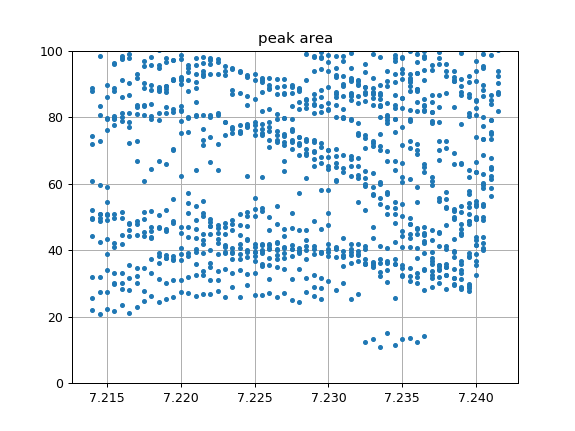

<IPython.core.display.Javascript object>


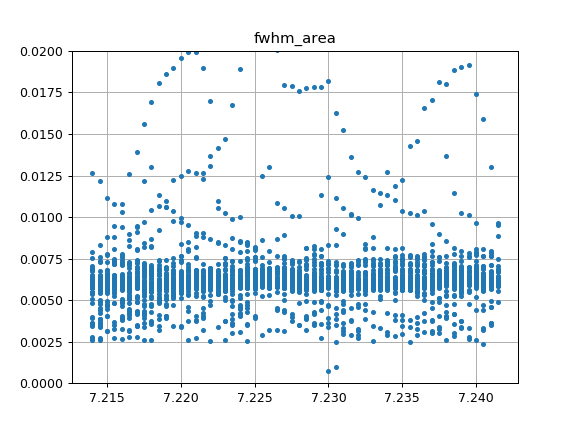

Frac. goodwith: 0.82


<IPython.core.display.Javascript object>


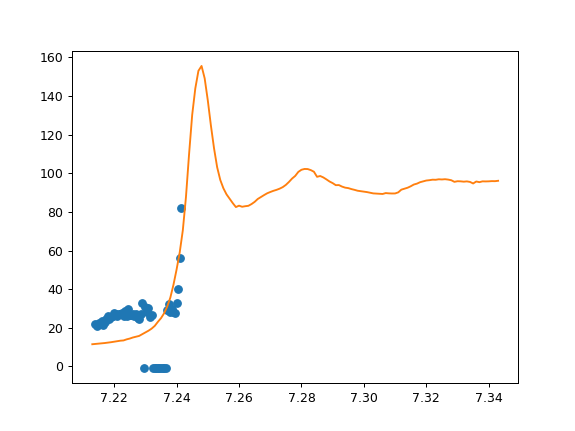

In [59]:
import pickle

#scans = range(854160, 862373) # full l3 list
test_scans = range(854160, 854260) # short test set
#scans = range(854160, 854180) # very short test set
#scans = range(854160, 856160) # 20 x short test set
l3_scans = range(854160, 857000) # L3 but miss out files from  857000 onwards as gaps in detector data

#p='/dls/i16/data/2020/mm25913-2/%i.nxs'
p='/dls/staging/dls/i16/data/2020/mm25913-2/%i.nxs'

l3_dict = analyse_images(l3_scans, p)

#pickle.dump(l3_dict, open('/dls/science/users/spc93/data/ggg_l3_res_dict.p', "wb" ) )
#test_dict = pickle.load( open('/dls/science/users/spc93/data/ggg_l3_res_dict.p' , "rb" ) ) # load back from pickle file

(enlist, arealist) = filter_results(l3_dict)

figure()
plot(enlist, arealist, 'o')

p='/dls/i16/data/2020/cm26473-2/%i.nxs'
n = pdnx(p % 823333) # L3 fluo
n['i_norm'] = n['sum']/n.ic1monitor
plot(n['DCMenergy'], n['i_norm']/1000)

In [ ]:
import time
figure(99); 
vol = n.nx.entry1.instrument.kthZebraPil3.data[:, r[1]:r[3], r[0]:r[2]]
for i in range(vol.shape[0]):
    pcolor(n.nx.entry1.instrument.kthZebraPil3.data[i, r[1]:r[3], r[0]:r[2]])   
    time.sleep(.5)
#pcolor(n.nx.entry1.instrument.kthZebraPil3.data[0, r[1]:r[3], r[0]:r[2]])


In [ ]:
im1, = ax.imshow(vol[0])

In [ ]:
### make rane full index scale - done
### use integers - done
### scale to max or autoscale - done
### change to function

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider, Button, RadioButtons

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(left=0.25, bottom=0.25)

im1 = ax.imshow(vol[0])
fig.colorbar(im1)

axidx = fig.add_axes([0.25, 0.1, 0.65, 0.03])
idx = Slider(axidx, 'Index', 0, vol.shape[0], valinit=0, valfmt = "%i")


def update(val):
    im1.set_data(vol[int(idx.val)])
    im1.autoscale()
    fig.canvas.draw()
idx.on_changed(update)

plt.show()

or use ipywidgets - IntSlider?

In [ ]:
#need py 3.7?
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-4, 4])
ax.grid(True)
 
# generate x values
x = np.linspace(0, 2 * np.pi, 100)
 
 
def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return amp*np.sin(w * (x-phi))
 
 
@widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))
def update(w = 1.0, amp=1, phi=0):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(x, my_sine(x, w, amp, phi), color='C0')

In [ ]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-4, 4])
ax.grid(True)
 
# generate x values
x = np.linspace(0, 2 * np.pi, 100)
 
 
def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    w = 1.0; phi = 0.0
    return amp*np.sin(w * (x-phi))
 
 
@widgets.interact(amp=(0, 4, .1))
def update(w = 1.0, amp=1, phi=0):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(x, my_sine(x, w, amp, phi), color='C0')

In [ ]:

#import matplotlib as mpl
#mpl.rcParams['axes.formatter.useoffset'] = False
rcParams['axes.formatter.useoffset'] = False


In [ ]:
#### plot 3d area vs psi vs E -OK?
#### show all images during processing ???

#######
# next: check l3 results: are the selected points OK?
######### no - the results are shit - need a propper look at what it's doing
# compare with previous spectra
# can we improve this?
# how to confirm reliability?
# look at l2, l1
# write and publish report (check any previous papers)

In [ ]:
# downloads: breaks file limit due to tiffs
# requested 854,5,6 8/12/21